In [328]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk import WordNetLemmatizer

In [329]:
from nltk.stem.porter import PorterStemmer
import re
import nltk
from nltk.tokenize import word_tokenize
import pkg_resources
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from symspellpy import SymSpell, Verbosity

sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt")
if sym_spell.word_count:
    pass
else:
    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# normalization
def func_norm(s):
    """
    Perform some basic normalisation operations.

    Parameters
    ----------
    s:  str
        text to operate on
    
    Returns
    -------
        Normalised string
    
    """
    s = s.lower() # lower case
    # letter repetition (>2)
    s  = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non word repetition
    s = s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # noise text
    s = re.sub(r' ing ', ' ', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)

    return s.strip()

def func_punc(w_list):
    """
    Remove non-alphabet characters. Includes punctuation.

    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    
    Returns
    -------
        list without non-alphabet characters
    """
    return [word for word in w_list if word.isalpha()]

def func_stopf(w_list):
    """
    Remove stop words

    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    
    Returns
    -------
        list without stop words
    """
    stop_words = set(stopwords.words('english'))
    w_list  = [f for f in w_list if f not in stop_words]
    return w_list

# stemming
pstem = PorterStemmer()

def func_stem(w_list):
    """
    stem word list

    Parameters
    ----------
    w_list: list
        word list for stemming

    Returns
    -------
        stemmed word list 
    """
    sw_list = [pstem.stem(w) for w in w_list]
    return sw_list

# selecting nouns
def func_noun(w_list):
    """
    in: word list to be processed
    out: w_list with only nouns selected
    """
    return [word for (word, pos) in nltk.pos_tag(w_list) if pos[:2] == 'NN']

def func_verb(w_list):
    """ 
    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    Returns
    -------
        list of verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if pos[:2] == 'VB']

def func_adjective(w_list):
    """ 
    Parameters
    ----------
    w_list: list
        list of tokens to be processed
    Returns
    -------
        list of verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if pos[:2] == 'JJ']

def func_inf_words(w_list):
    """ 
    Retain verbs, adjectives and nouns only

    Parameters
    ----------
    w_list: list
        list of words to be processed
    Returns
    -------
    list of nouns, adjectives and verbs only
    """
    return [word for (word,pos) in nltk.pos_tag(w_list) if 'VB' in pos or 'JJ' in pos or 'NN' in pos]

# spell checker/typo correction
def func_spell(w_list):
    """
    in: word list to be processed
    out: w_list with typo fixed by symspell. words with no match up will be dropped
    """
    w_list_fixed = []
    for word in w_list:
        if any(map(word.__contains__, ['covid','lockdown'])):
            w_list_fixed.append(word)
        else:
            suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=3)
            if suggestions:
                w_list_fixed.append(suggestions[0].term)
            else:
                pass
    return w_list_fixed

def get_pos_tag(tag):

    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
def func_lemmatize(word_list):
    """
    Lemmatize word list.

    Parameters
    ----------
    word_list:  list
        words to process
    
    Returns
    -------
    Lemmatized word list.

    """
    lemmatizer = WordNetLemmatizer()
    word_list = nltk.pos_tag(word_list)
    words_lemmatized = [lemmatizer.lemmatize(word,get_pos_tag(tag))
                        for (word,tag) in word_list]
    return words_lemmatized

def preprocess_sent(rw):
    """
    Get sentence level preprocessed data from raw texts

    Parameters
    ----------
        rw: str
            sentence to be processed

    Returns
    -------
        sentence level pre-processed text
    """
    s = func_norm(rw)

    return s



def preprocess_word(s):
    """
    Get word level preprocessed data from preprocessed sentences.
    
    Parameters
    ----------
    s:  str
        sentence to be processed
    
    Returns
    -------
        word level pre-processed text
    """
    if not s:
        return None
    w_list = word_tokenize(s)
    w_list = func_punc(w_list)
   # w_list = func_inf_words(w_list)
    w_list = func_spell(w_list)
    w_list = func_lemmatize(w_list)
    w_list = func_stopf(w_list)

    return w_list

def preprocess(docs):
    """
    Preprocess the data.

    Parameters
    ----------
    docs: list
        list of documents to be preprocessed
    
    Returns
    -------
        Preprocessed sentences, tokens
    """
    print('Preprocessing raw texts ...')
    #n_docs = len(docs)
    sentences = []  # sentence level preprocessed
    token_lists = []  # word level preprocessed
    #samp = np.random.choice(n_docs)
    for i in range(0, len(docs)):
        sentence = preprocess_sent(docs.iloc[i])
        token_list = preprocess_word(sentence)
        if token_list:
            sentences.append(sentence)
            token_lists.append(token_list)
        print('{} %'.format(str(np.round((i + 1) / len(writing_df.writing) * 100, 2))), end='\r')
    print('Preprocessing raw texts. Done!')
    return sentences, token_lists

utils

In [330]:
import scikit_posthocs as sp
from scipy import stats
from textblob import TextBlob
import statsmodels.api as sm
import statsmodels.formula.api as smf


def kruskal_wallis_func(in_df, group_col, test_col):
    """
    Kruskal Wallis test and
    post-hoc Dunn's.

    Parameters
    ----------
    in_df:  pd DataFrame
        input dataframe
    group_col:  str
        name of group column
    test_col:   str
        name of column containing
        relevant values

    Returns
    -------
    Statistic, pvalue
    """
    data = in_df.pivot(columns = group_col, values = test_col)
    if len(in_df[group_col].unique())>2:
            statistic,pval = stats.kruskal(data.iloc[:,0],data.iloc[:,1],
            data.iloc[:,2],nan_policy = 'omit')
            posthoc = sp.posthoc_dunn(
                        [data.iloc[:,0].dropna(),data.iloc[:,1].dropna(),data.iloc[:,2].dropna()],
                        p_adjust = 'bonferroni'
                        )
            key = [data.columns[0],data.columns[1],data.columns[2]]
    else:
        statistic,pval = stats.kruskal(data.iloc[:,0],data.iloc[:,1],
        nan_policy = 'omit')
        posthoc = None
        key = None
    return statistic,pval, posthoc, key


def get_sentiment(in_df, in_col):
    """
    Get subjectivity
    and polarity scores.

    Parameters
    ----------
    in_df:  pd DataFrame
        DataFrame to operate on
    in_col: str
        column holding text data
        to operate on
    
    Returns
    -------
    Input DataFrame with
    subjectivity/polarity columns
    added.

    """
    print("Getting sentiment scores...")
    in_df = in_df.assign(
                        polarity = in_df[in_col].astype('str').apply(
                        [lambda x: TextBlob(x).sentiment.polarity]),
                        subjectivity = in_df[in_col].astype('str').apply(
                        [lambda x: TextBlob(x).sentiment.subjectivity])
                        )
    print("Done!")
    return in_df

def run_mixedlm(in_df,group_name,formula, re_intercept):
    """ 
    Run statsmodels LMEM.

    Parameters
    ----------
    in_df:  pandas DataFrame
        input dataframe
    group_name: str
        column to group by
    formula:    str
        patsy formula

    Returns
    -------
    MixedLMResults instance
    """
    if re_intercept:
        model = smf.mixedlm(
                            formula, in_df, groups = group_name,re_formula = re_intercept, missing = 'drop'
                            ).fit()
    else:
        model = smf.mixedlm(formula, in_df, groups = group_name,missing = 'drop').fit()
    return model

def run_gee(in_df,group_name,formula,cov_structure, resp_family):
    """ 
    Run statsmodels GEE.

    Parameters
    ----------
    in_df:  pandas DataFrame
        input dataframe
    group_name: str
        column to group by
    formula:    str
        patsy formula
    cov_structure:  sm covariance structure
        covariance structure (e.g. sm.cov_struct.Independence())
    resp_family:    sm family (e.g. sm.families.Tweedie())
        mean response structure distribution

    Returns
    -------

    """
    model = smf.gee(formula,group_name, in_df, cov_struct = cov_structure, family = resp_family,missing = 'drop').fit()
    
    return model

def flatten_list(list_of_lists):
    """
    Flatten list of lists.

    Parameters
    ----------
    list_of_lists:  list
        list of lists to flatten
    
    Returns
    -------
    Flattened list.
    """
    return [item for sub_list in list_of_lists for item in sub_list]

In [331]:
from nltk import FreqDist
from nltk.corpus import wordnet
from sklearn import feature_extraction, model_selection, pipeline, metrics
from sklearn.svm import LinearSVC

class Word_Analyzer:
    """
    Class for word frequency based analysis.
    """
    def __init__(self, day_col_name, group_col_name, token_col_name):
        self.day_col = day_col_name
        self.group_col = group_col_name
        self.token_col = token_col_name

    def get_pos_tag(self, tag):
        """
        Get wordnet pos tag.

        Parameters
        ----------
        tag:    str
        POS tag (from nltk pos_tag output tuple)

        Returns
        -------
        wordnet pos tag
        can be passed to nltk lemmatizer.
        """

        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    
    def func_lemmatize(self, word_list):
        """
        Lemmatize word list.

        Parameters
        ----------
        word_list:  list
            words to process
        
        Returns
        -------
        Lemmatized word list.

        """
        lemmatizer = WordNetLemmatizer()
        word_list = nltk.pos_tag(word_list)
        words_lemmatized = [lemmatizer.lemmatize(word,get_pos_tag(tag))
                            for (word,tag) in word_list]
        return words_lemmatized
    
    def get_top_words(self, num_day, group_name, in_df, **pos_tag_type):
        """ 
        Get an ordered list of words in document.

        Parameters
        ----------
        num_day:    int
            Day of writing (1, 2, 3 or 4)
        group_name: str
            The group to process (EW, EWRE or CTR)
        in_df:  pd DataFrame
            input dataframe containing rel data
        **pos_tag_type: list of str
            If processing only nouns/verbs/adjectives
            pass tag to function using kwargs.
            For adjectives, use:
            'JJ'
            For verbs, use:
            'VB'
            For nouns, use:
            'NN'
            If all of the above, pass list:
            ['NN','JJ','VB']
            as kwarg.

        Returns
        -------
        list of words, list of vals
        words = words ordered from most frequent to rare
        vals = corresponding frequency
        """
        token_list = [
                    item for sublist in
                    [*in_df.loc[
                    (in_df[self.group_col] == group_name) &
                    (in_df[self.day_col] == num_day),
                    self.token_col]]
                    for item in sublist
                    ]

    
        if pos_tag_type:
            selected_list = []
            for tag_type in pos_tag_type.values():
                w_list = [
                        word for (word,pos) 
                        in nltk.pos_tag(token_list)
                        for tag in tag_type
                        if pos[:2] == tag
                        ]
                selected_list.extend(w_list)
        else:
            selected_list = token_list
        freqs = FreqDist(selected_list)
        common_tups = freqs.most_common()
        self.common_words = list(zip(*common_tups))[0]
        self.common_vals = list(zip(*common_tups))[1]
        return self.common_words, self.common_vals
    
    def func_top_words(self, in_df, pos_tags, visualize):
        """
        Put top 50 words in dataframe,
        with option to visualize using barplots.

        Parameters
        ----------
        in_df:  pd DataFrame
        input dataframe
        pos_tags:   list
            list of pos tags to use
            can be VB, JJ, NN or
            any combination (or all) of these
        visualize:  int
        1 if visualization is needed
        0 otherwise

        Returns
        -------
        Datframe of 50 top words
        and their frequencies for 
        all days and conditions.

        """

        top_50_words = []
        top_50_vals = []
        condition = []
        days = []

        for group_name in in_df[self.group_col].unique():
            for day in in_df[self.day_col].unique():
                words,vals= self.get_top_words(day, group_name, in_df, pos_tags = pos_tags)
                top_50_words.append(list(words[:50]))
                top_50_vals.append(list(vals[:50]))
                condition.append(np.repeat(group_name,50))
                days.append(np.repeat(day,50))

        data = {
            'words': flatten_list(top_50_words),
            'vals': flatten_list(top_50_vals),
            'day': flatten_list(days),
            'group': flatten_list(condition)
            }
        self.most_common_words_df = pd.DataFrame(data)

        if visualize == 1:
            for num_day in self.most_common_words_df.day.unique():
                fig,axes = plt.subplots(3,1,figsize = (30,15),sharey = True)
                for i, group_name in enumerate(self.most_common_words_df.group.unique()):
                    data = self.most_common_words_df.loc[
                                                    (self.most_common_words_df.day==num_day) &
                                                    (self.most_common_words_df.group == group_name),
                                                    ['words','vals']
                                                    ]
                    sns.barplot(ax=axes[i], x=data.words, y=data.vals)
                    axes[i].set_title(f'Condition: {group_name}, Day: {num_day}')

        return self.most_common_words_df
    
    def print_top10(self, vectorizer, clf):
        """
        Prints features with the highest coefficient values,
        per class

        """
        feature_names = vectorizer.get_feature_names()
        for i, class_label in enumerate(clf.classes_):
            top10 = np.argsort(clf.coef_[i])[-15:]
            print("%s: %s" % (class_label,
                " ".join(feature_names[j] for j in top10)))

    def tf_idf_scores(self, in_df, writing_col,*cleaned):
        """
        Classify statements using Linear SVC
        and print top 10 distinguishing features

        in_df:  pd DataFrame
            input dataframe
        
        writing_col:    str
            name of column containing written statements
        
        Returns
        -------
        Dataframe containing predictions
        and actual class labels
        for holdout test set
        """
        if cleaned:
            in_df['writing_cleaned'] = in_df[self.token_col].apply(lambda x: ' '.join(x))
            writing_col = 'writing_cleaned'
        
        self.wrdf_train,self.wrdf_test = model_selection.train_test_split(in_df.loc[:,[writing_col, self.group_col]],
                                                                test_size = 0.3,random_state = 35,
                                                                stratify = in_df[self.group_col])
        y_train = self.wrdf_train[self.group_col]
        y_test = self.wrdf_test[self.group_col]
        vectorizer_tf_idf = feature_extraction.text.TfidfVectorizer(sublinear_tf = True)
        clf = LinearSVC(C=1.0, class_weight="balanced")
        tf_idf = pipeline.Pipeline([('tfidf', vectorizer_tf_idf),("classifier", clf)])
        tf_idf.fit(self.wrdf_train[writing_col], y_train)
        predicted = tf_idf.predict(self.wrdf_test[writing_col])

        self.res_df = pd.DataFrame({'actual': y_test.values, 'predicted': predicted})
        self.print_top10(vectorizer_tf_idf,clf)

        return self.res_df,clf


    
    def tf_idf_features(self, in_df, writing_col,*cleaned):
        """
        get TF-IDF features
        
        Parameters
        ----------
        corpus: sequence of items of type str
            text corpus to be processed

        kwargs:
        num_day:    int
         Integer denoting day of writing
        group_name: str
            String denoting writing condition
        
        Returns
        -------
        List of features

        """
        
                            
        if cleaned:
            corpus = in_df[self.token_col].apply(lambda x: ' '.join(x))
        else:
            corpus = in_df[writing_col]
        vectorizer_tf_idf = feature_extraction.text.TfidfVectorizer(sublinear_tf = True)
        features = vectorizer_tf_idf.fit_transform(corpus)
        feats_df = pd.DataFrame(features[0].T.todense(), index=vectorizer_tf_idf.get_feature_names(), columns=["TF-IDF"])
        self.feats_df = feats_df.sort_values('TF-IDF', ascending=False)

        return self.feats_df
    
    def plot_confusion_matrix(self):
        """
        Plot the confusion matrix
        for classifier results.
        """
        # Plot the confusion matrix.
        y_test = self.res_df['actual']
        classes = np.unique(y_test)
        #y_test_array = pd.get_dummies(y_test, drop_first=False).values    
        cm = metrics.confusion_matrix(y_test, self.res_df['predicted'])
        fig, ax = plt.subplots()
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
        ax.set(xlabel="Pred", ylabel="True", xticklabels= classes, yticklabels=classes, title="Confusion matrix")
        plt.yticks(rotation=0) 



In [332]:
home = 0
if home:
    infiledir = r"C:\Users\Luzia T\UCL\WorkingFromHome\Possible_online_studies\NLP_expressive_writing\analysis\Processed_2"
    writing_dir = r"C:\Users\Luzia T\UCL\WorkingFromHome\Possible_online_studies\NLP_expressive_writing\analysis\writing_data\statements"
else:
    infiledir = r"P:\EW_analysis\analysis\Processed_2"
    writing_dir = r"P:\EW_analysis\analysis\writing\writing_data"

In [333]:
writing_df = pd.read_csv(os.path.join(writing_dir, 'writing_df.csv'))

In [334]:
sentences,tokens = preprocess(writing_df.writing)
writing_df = writing_df.assign(
                                writing_tokens=tokens,
                                writing_sents = sentences
                                )
writing_df = writing_df.assign(
                                word_count = writing_df.writing_tokens.apply(len)
                                )
writing_df = writing_df.assign(
                                word_count_raw =
                                writing_df.writing.apply(lambda x: len(x.split()))
                                )
writing_df = get_sentiment(writing_df,'writing')
for val in ['word_count','word_count_raw','polarity','subjectivity']:
        # check whether word count is significantly different between conditions:
        _, pval, posthoc, key = kruskal_wallis_func(
                                        writing_df,'Group', val
                                        )
        print(f"\nP value ({val}) is {pval}.")
        if pval<0.05:
                print(f"Conditions differ significantly on {val}.")
                print(f"Posthoc ({val}) is:\n{posthoc}.")
                print(f"The key is 1 = {key[0]}, 2 = {key[1]}, 3 = {key[2]}")
        else:
                print(f"No significant between group differences on {val}.")

Preprocessing raw texts ...
Preprocessing raw texts. Done!
Getting sentiment scores...
Done!

P value (word_count) is 0.00972972280113964.
Conditions differ significantly on word_count.
Posthoc (word_count) is:
          1         2         3
1  1.000000  0.283874  0.007122
2  0.283874  1.000000  0.523870
3  0.007122  0.523870  1.000000.
The key is 1 = CTR, 2 = EW, 3 = EWRE

P value (word_count_raw) is 0.0029349359121382448.
Conditions differ significantly on word_count_raw.
Posthoc (word_count_raw) is:
          1         2         3
1  1.000000  0.083669  0.002315
2  0.083669  1.000000  0.748153
3  0.002315  0.748153  1.000000.
The key is 1 = CTR, 2 = EW, 3 = EWRE

P value (polarity) is 0.03688590519079081.
Conditions differ significantly on polarity.
Posthoc (polarity) is:
          1        2         3
1  1.000000  1.00000  0.124654
2  1.000000  1.00000  0.053490
3  0.124654  0.05349  1.000000.
The key is 1 = CTR, 2 = EW, 3 = EWRE

P value (subjectivity) is 1.3978564535849075e-31.


In-depth analysis of between-condition differences (EW/EWRE)
(i) There should be no differences between EW & EWRE on D1.
(ii) D2: effects/responsibility
(iii) D3: different angles/perspectives
(iv) D4: learnt/gained/future perspectives
Change in most frequent words?
Change in polarity?

Day-by-day changes, comparing EW and EWRE

In [335]:
model_polarity_gee = run_gee(
                            writing_df[writing_df.Group.isin(['EW','EWRE'])],
                            "id", "polarity ~ C(day) * C(Group)",
                            cov_structure = sm.cov_struct.Independence(),
                            resp_family = sm.families.Gaussian()
                            )

print(model_polarity_gee.summary2())

                               Results: GEE
Model:                  GEE                  AIC:                -720.9234 
Link Function:          identity             BIC:                -1804.5687
Dependent Variable:     polarity             Log-Likelihood:     368.46    
Date:                   2022-01-04 18:00     LL-Null:            361.83    
No. Observations:       321                  Deviance:           1.8924    
Df Model:               7                    Pearson chi2:       1.89      
Df Residuals:           313                  Scale:              0.0060460 
Method:                 IRLS                                               
---------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
---------------------------------------------------------------------------
Intercept                     0.0400   0.0102  3.9338 0.0001  0.0201 0.0600
C(day)[T.2]                   0.0060   0.015

In [336]:
wa = Word_Analyzer('day','Group','writing_tokens')
top_adj_df = wa.func_top_words(writing_df, ['JJ'],0)
top_vbs_df = wa.func_top_words(writing_df,['VB'], 0)
top_nns_df = wa.func_top_words(writing_df, ['NN'],0)
top_words_df = wa.func_top_words(writing_df, ['VB','JJ','NN'],0)

CTR: morning coffee wash book finish around walk minute lunch plan wake dinner bed breakfast watch
EW: apart stomach whether effect friendship contact tell university miss less country never etc everyone pandemic
EWRE: uncle learn want happy felt career feel guess covid date experience find lockdown end especially


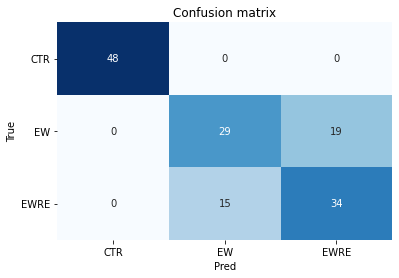

In [337]:
res_df,clf = wa.tf_idf_scores(writing_df,'writing',1)
wa.plot_confusion_matrix()

In [338]:
tf_idf_features = wa.tf_idf_features(writing_df,'writing',1)
print(tf_idf_features['TF-IDF'].sort_values(ascending = False)[10:])

excite      0.149507
elderly     0.149507
skype       0.149507
reassure    0.149507
hopeful     0.144282
              ...   
wine        0.000000
wing        0.000000
winter      0.000000
wipe        0.000000
zoom        0.000000
Name: TF-IDF, Length: 7077, dtype: float64
